In [ ]:
%%bash
pip3 install deep_phonemizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for deep_phonemizer: filename=deep_phonemizer-0.0.17-py3-none-any.whl size=29727 sha256=ddcfee5d1bf57824be26fa6b4fc9b7bc2320050fb1668cfa4edfdc9abef4d132
  Stored in directory: /root/.cache/pip/wheels/e4/cc/ce/e329d15bd6374b9bcdc717d00c4d0f934c3ca2091ebf0a1968
Successfully built deep_phonemizer


In [ ]:
import torch
import torchaudio
import matplotlib.pyplot as plt
import IPython

In [ ]:
device = 'cuda' if torch.cuda.is_available() else'cpu'

In [ ]:
device

'cuda'

In [ ]:
symbols = '_-!\'(),.:;? abcdefghijklmnopqrstuvwxyz'
look_up = {s: i for i, s in enumerate(symbols)}
symbols = set(symbols)

def text_to_sequence(text):
  text = text.lower()
  return [look_up[s] for s in text if s in symbols]

text = "Hello world! Text to speech!"
print(text_to_sequence(text))

[19, 16, 23, 23, 26, 11, 34, 26, 29, 23, 15, 2, 11, 31, 16, 35, 31, 11, 31, 26, 11, 30, 27, 16, 16, 14, 19, 2]


In [ ]:
processor = torchaudio.pipelines.TACOTRON2_WAVERNN_CHAR_LJSPEECH.get_text_processor()

text = "Hello world! Text to speech!"
processed, lengths = processor(text)

print(processed)
print(lengths)

tensor([[19, 16, 23, 23, 26, 11, 34, 26, 29, 23, 15,  2, 11, 31, 16, 35, 31, 11,
         31, 26, 11, 30, 27, 16, 16, 14, 19,  2]])
tensor([28], dtype=torch.int32)


## Encoding

### Character-Based Encoding

In [ ]:
processor = torchaudio.pipelines.TACOTRON2_WAVERNN_CHAR_LJSPEECH.get_text_processor()
text = "Hello world! Text to speech!"
processed, lengths = processor(text)
print(processed)
print(lengths)
print([processor.tokens[i] for i in processed[0, :lengths[0]]])

tensor([[19, 16, 23, 23, 26, 11, 34, 26, 29, 23, 15,  2, 11, 31, 16, 35, 31, 11,
         31, 26, 11, 30, 27, 16, 16, 14, 19,  2]])
tensor([28], dtype=torch.int32)
['h', 'e', 'l', 'l', 'o', ' ', 'w', 'o', 'r', 'l', 'd', '!', ' ', 't', 'e', 'x', 't', ' ', 't', 'o', ' ', 's', 'p', 'e', 'e', 'c', 'h', '!']


### Phoneme-Based Encoding

In [ ]:
bundle = torchaudio.pipelines.TACOTRON2_WAVERNN_PHONE_LJSPEECH
processor = bundle.get_text_processor()
text = "Hello world! Text to speech!"
with torch.inference_mode():
  processed, lengths = processor(text)
print(processed)
print(lengths)
print([processor.tokens[i] for i in processed[0, :lengths[0]]])

tensor([[54, 20, 65, 69, 11, 92, 44, 65, 38,  2, 11, 81, 40, 64, 79, 81, 11, 81,
         20, 11, 79, 77, 59, 37,  2]])
tensor([25], dtype=torch.int32)
['HH', 'AH', 'L', 'OW', ' ', 'W', 'ER', 'L', 'D', '!', ' ', 'T', 'EH', 'K', 'S', 'T', ' ', 'T', 'AH', ' ', 'S', 'P', 'IY', 'CH', '!']


In [ ]:
tacotron2 = bundle.get_tacotron2().to(device)
vocoder = bundle.get_vocoder().to(device)
with torch.inference_mode():
  processed, lengths = processor('Hi my name MD. Musadiq Ahamed and I study in B.Tech 3rd year of Jawaharlal Nehru Technological university College of engineering pulivendula but i actually stay in nellore')
  processed = processed.to(device)
  lengths = lengths.to(device)
  spec, spec_lengths, _ = tacotron2.infer(processed, lengths)
  waveform, lengths = vocoder(spec, spec_lengths)
torchaudio.save("output_griffinlim.wav", waveform[0:1].cpu(), sample_rate = vocoder.sample_rate)
IPython.display.display(IPython.display.Audio("output_griffinlim.wav"))

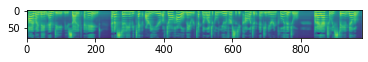

In [ ]:
plt.imshow(spec[0].cpu().detach())